#📌 Extracción

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_json('TelecomX_Data.json', )
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [8]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_final = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

df_final


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
df_final.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [10]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [11]:
df_final.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [12]:
df_final['Cuentas_Diarias'] = round(df_final['Charges.Monthly']/30,2)
df_final = df_final.replace({'Yes': 1, 'No': 0})
df_final

C:\Users\User\AppData\Local\Temp\ipykernel_20924\548288013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


#📊 Carga y análisis

In [13]:
df_final[['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].describe()

,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,2.157292
std,30.129572,2268.632997,1.004407
min,18.250000,18.800000,0.610000
25%,35.425000,400.225000,1.180000
50%,70.300000,1391.000000,2.340000
75%,89.875000,3785.300000,2.995000
max,118.750000,8684.800000,3.960000


In [14]:
clientes_filtrado = df_final[df_final['Churn'].isin([0, 1])].value_counts().reset_index()

conteo = clientes_filtrado['Churn'].value_counts()

# Cliente Retirados Vs Clientes que continúan
# Hacer grafico

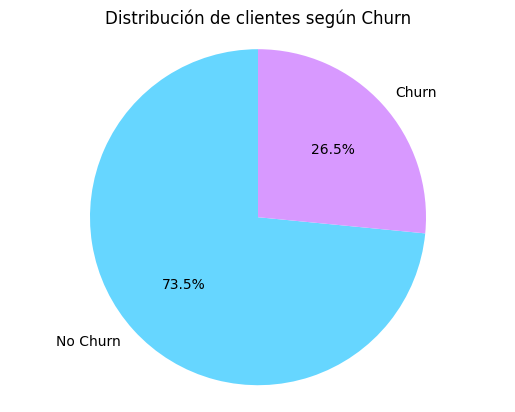

In [27]:
import matplotlib.pyplot as plt


df_filtrado = df_final[df_final['Churn'].isin([0, 1])]


conteo = df_filtrado['Churn'].value_counts().sort_index()


etiquetas = ['No Churn', 'Churn']
valores = [conteo.get(0, 0), conteo.get(1, 0)]


plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=["#66d6ff", "#d899ff"])
plt.axis('equal')
plt.title('Distribución de clientes según Churn')
plt.show()

In [15]:
# evasión vs genero
evasion_genero  = pd.crosstab(df_final['gender'], df_final['Churn'])

# Hacer grafico

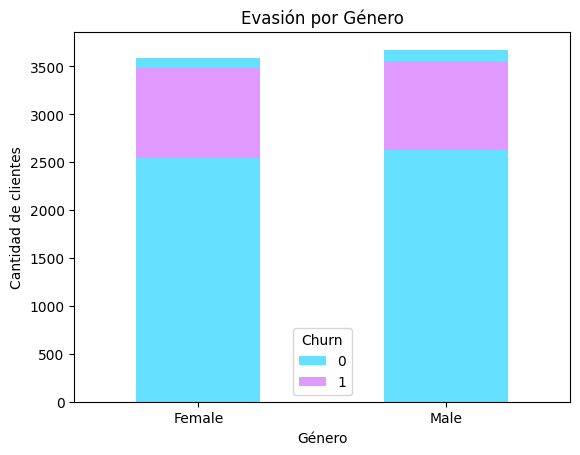

In [28]:
import matplotlib.pyplot as plt

# Usamos el crosstab que ya tienes
evasion_genero = pd.crosstab(df_final['gender'], df_final['Churn'])

# Crear gráfico de barras apiladas
evasion_genero.plot(kind='bar', stacked=True, color=["#66e0ff", "#df99ff"])

plt.title('Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)  # Para que las etiquetas de eje X estén horizontales
plt.legend(title='Churn')
plt.show()

In [16]:
# evasión vs tipo de contrato

evasion_contrato = pd.crosstab(df_final['Contract'],df_final['Churn'])
evasion_contrato

# Hacer grafico


Churn,0,1,
Contract,,,
Month-to-month,2220,1655,130
One year,1307,166,46
Two year,1647,48,48


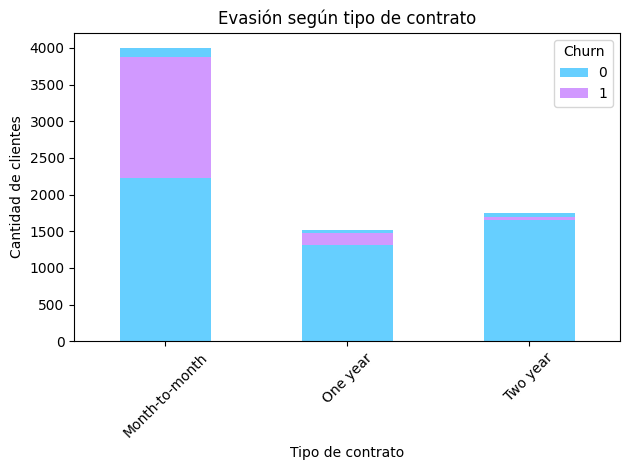

In [29]:
import matplotlib.pyplot as plt

# Usando la tabla de contingencia correcta
evasion_contrato.plot(kind='bar', stacked=True, color=["#66cfff", "#d199ff"])

plt.title('Evasión según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [17]:
# evasion vs método de pago
evasion_fpago = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'])

# Hacer grafico

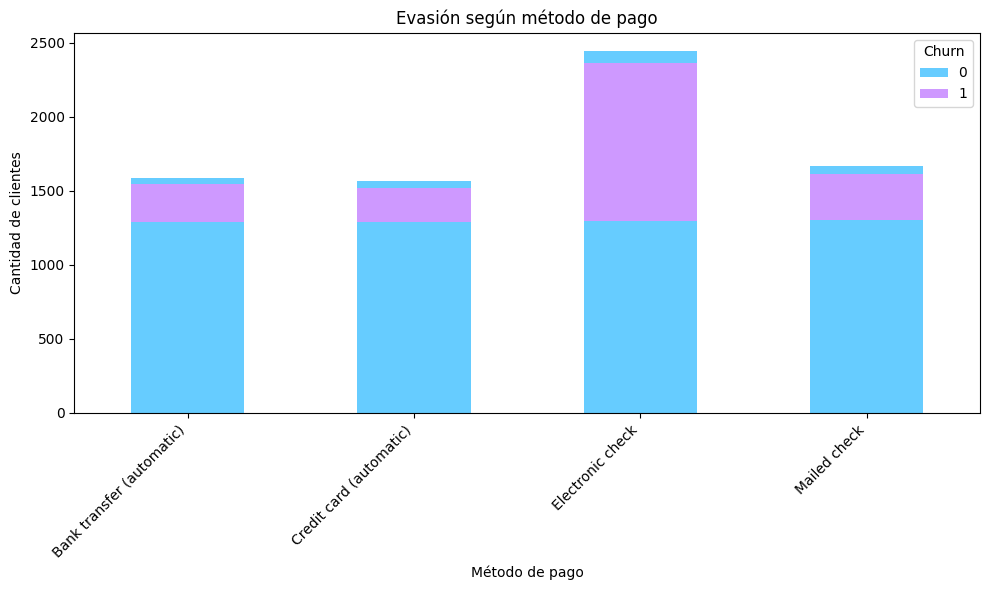

In [30]:
import matplotlib.pyplot as plt

# Asumiendo que ya tienes evasion_fpago con el crosstab
# evasion_fpago = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'])

# Graficar barras apiladas
evasion_fpago.plot(kind='bar', stacked=True, color=["#66ccff", "#ce99ff"], figsize=(10,6))

plt.title('Evasión según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')  # Rota y alinea las etiquetas para mejor lectura
plt.legend(title='Churn')
plt.tight_layout()  # Ajusta el layout para que no se corte nada
plt.show()

#📄Informe final

# Introduccion 

Este proyecto corresponde a un trabajo práctico cuyo propósito es comprender las razones por las cuales los clientes de Telecom X deciden cancelar sus servicios. Para ello, se llevó a cabo un análisis exhaustivo de datos reales relacionados con ventas y comportamiento de los usuarios

# Objetivo

El objetivo principal es descubrir las causas detrás de la pérdida de clientes mediante un enfoque basado en el análisis de datos, enfocándonos en aspectos clave como:

* Comparación entre clientes que permanecen y clientes que se dan de baja.

* Relación entre evasión y género.

* Impacto del tipo de contrato en la tasa de abandono.

* Influencia del método de pago en la permanencia del cliente.

# Herramientas empleadas

* Python para manipulación y análisis de datos.

* Pandas para la gestión eficiente de la información.

* Matplotlib para la creación de visualizaciones gráficas.

* Markdown para documentar y presentar los hallazgos.

# Explorando la Evasión de Clientes en Telecom X
1. ¿Cuántos se van y cuántos se quedan?
Primero, hicimos un gráfico de torta para ver cuántos clientes siguen con el servicio y cuántos se van. Resulta que un buen porcentaje decide dejar la compañía, así que vale la pena entender por qué pasa esto.

2. ¿La evasión cambia según el género?
Al comparar hombres y mujeres, vimos que más o menos se van en las mismas proporciones. No hay una diferencia clara que diga que uno u otro género abandona más.

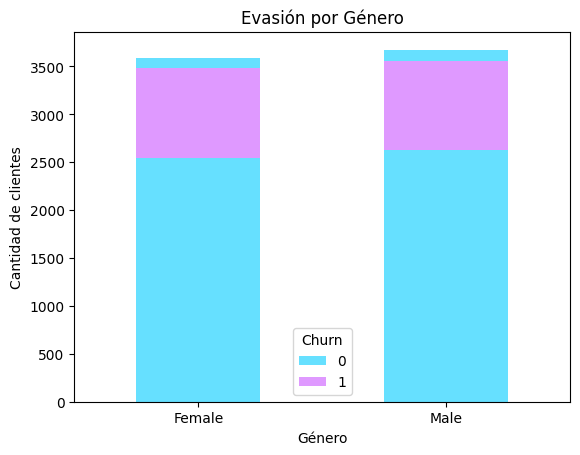

3. ¿Qué pasa con el tipo de contrato?
Aquí sí hubo diferencia: los clientes que tienen contratos mes a mes son los que más se van. No es raro, porque es más fácil cancelar ese tipo de contrato. Los que tienen contratos de uno o dos años suelen quedarse más tiempo.

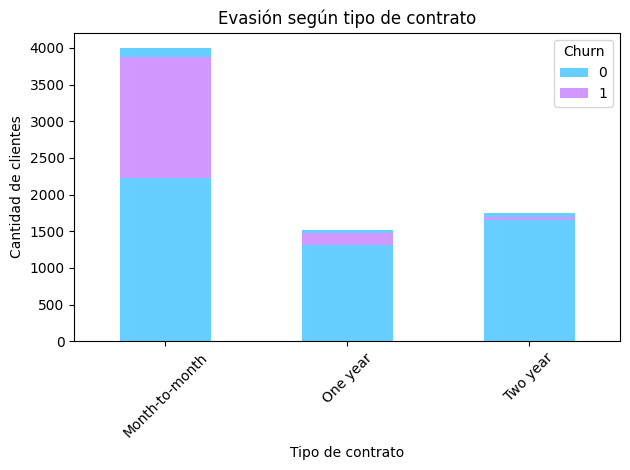

4. ¿Y el método de pago?
Cuando miramos cómo pagan, notamos que quienes usan cheque electrónico tienden a irse más que los que usan otros métodos. Tal vez sea algo que Telecom X debería revisar para hacerlo más cómodo.

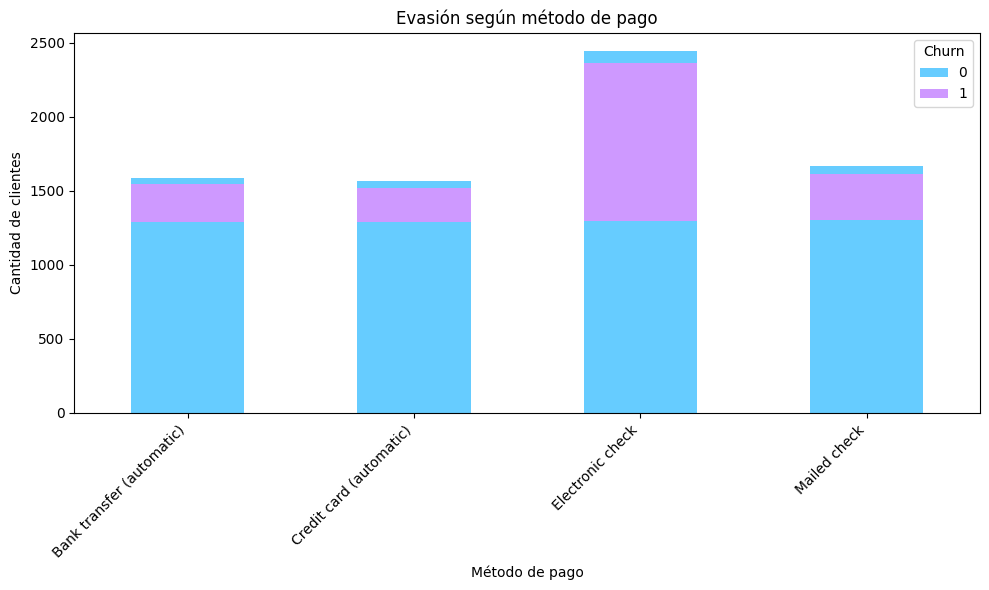

¿Qué aprendimos hasta ahora?
Parece que el contrato y el método de pago influyen bastante en si un cliente se queda o no, mientras que el género no afecta mucho. Así que, para evitar que más clientes se vayan, Telecom X podría pensar en ofrecer mejores opciones de contrato y mejorar la experiencia de pago.

# Conclusión
El análisis de los datos muestra que la tasa de evasión de clientes en Telecom X está más relacionada con el tipo de contrato y el método de pago que con el género del cliente. Los contratos mes a mes presentan una mayor tendencia a la cancelación, probablemente por su flexibilidad, mientras que los contratos a largo plazo ayudan a retener mejor a los usuarios. Además, ciertos métodos de pago, como el cheque electrónico, parecen estar asociados con mayores tasas de abandono, lo que indica que podría haber problemas o incomodidades en esa modalidad.

Estos hallazgos sugieren que Telecom X debería enfocar sus esfuerzos en promover contratos más estables y en mejorar la experiencia de los clientes con métodos de pago que presentan mayores índices de churn, para así reducir la evasión y aumentar la fidelidad.